In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
import warnings
warnings.filterwarnings('ignore')

In [84]:
df = pd.read_csv("/content/drive/MyDrive/DataSets/Unemployment in India.csv")
df.head()

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural


In [85]:
df.describe()

,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%)
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 7 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Region                                    740 non-null    object 
 1    Date                                     740 non-null    object 
 2    Frequency                                740 non-null    object 
 3    Estimated Unemployment Rate (%)          740 non-null    float64
 4    Estimated Employed                       740 non-null    float64
 5    Estimated Labour Participation Rate (%)  740 non-null    float64
 6   Area                                      740 non-null    object 
dtypes: float64(3), object(4)
memory usage: 42.1+ KB


In [87]:
df.shape

(768, 7)

# Data cleaning

In [88]:
# Remove leading/trailing spaces from all column names
df.columns = df.columns.str.strip()
print(df.columns)


Index(['Region', 'Date', 'Frequency', 'Estimated Unemployment Rate (%)',
       'Estimated Employed', 'Estimated Labour Participation Rate (%)',
       'Area'],
      dtype='object')


In [89]:
df.drop('Date', axis=1, inplace=True)

In [90]:
df.isnull().sum()

,0
Region,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [91]:
# Fill missing values
df.fillna(0, inplace=True)

In [92]:
df.duplicated().sum()

np.int64(27)

In [93]:
df.drop_duplicates(inplace=True)

# Data Analysis and Visualization

### Univariate analysis

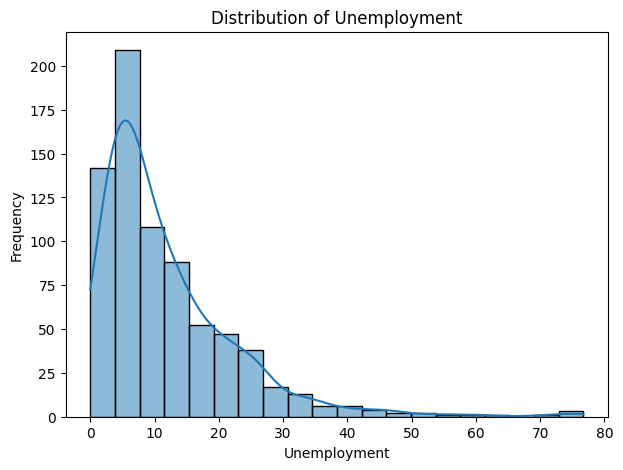


Statistical Summary of Unemployment:

count    741.000000
mean      11.772038
std       10.722800
min        0.000000
25%        4.650000
50%        8.330000
75%       15.880000
max       76.740000
Name: Estimated Unemployment Rate (%), dtype: float64


In [94]:
# Distribution of Unemployment Rate
plt.figure(figsize=(7,5))
sns.histplot(df['Estimated Unemployment Rate (%)'], kde=True, bins=20)
plt.title(f"Distribution of Unemployment")
plt.xlabel('Unemployment')
plt.ylabel("Frequency")
plt.show()

# Statistical Summary
print(f"\nStatistical Summary of Unemployment:\n")
print(df['Estimated Unemployment Rate (%)'].describe())

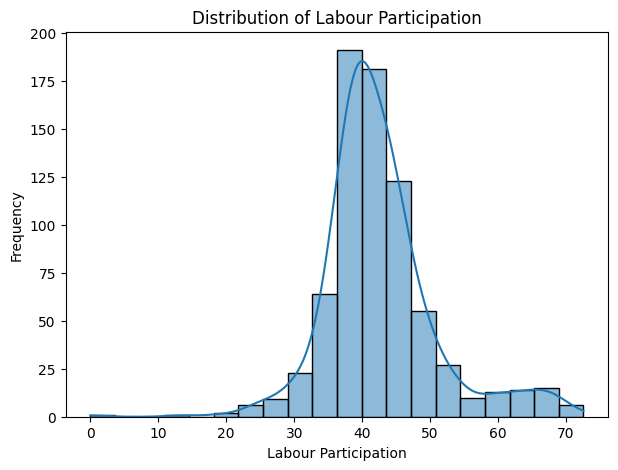


Statistical Summary of Labour Participation:

count    741.000000
mean      42.572591
std        8.255512
min        0.000000
25%       38.040000
50%       41.140000
75%       45.490000
max       72.570000
Name: Estimated Labour Participation Rate (%), dtype: float64


In [95]:
# Distribution of Labour Participation
plt.figure(figsize=(7,5))
sns.histplot(df['Estimated Labour Participation Rate (%)'], kde=True, bins=20)
plt.title(f"Distribution of Labour Participation")
plt.xlabel('Labour Participation')
plt.ylabel("Frequency")
plt.show()

# Statistical Summary
print(f"\nStatistical Summary of Labour Participation:\n")
print(df['Estimated Labour Participation Rate (%)'].describe())

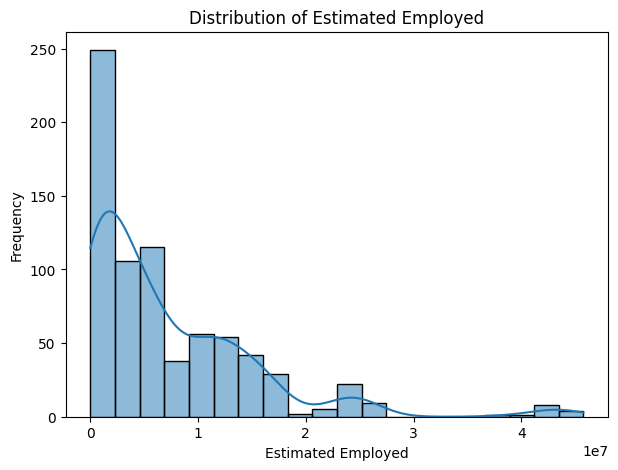


Statistical Summary of Estimated Employed:

count    7.410000e+02
mean     7.194737e+06
std      8.086854e+06
min      0.000000e+00
25%      1.183770e+06
50%      4.743179e+06
75%      1.126583e+07
max      4.577751e+07
Name: Estimated Employed, dtype: float64


In [96]:
# Distribution of Estimated Employed
plt.figure(figsize=(7,5))
sns.histplot(df['Estimated Employed'], kde=True, bins=20)
plt.title(f"Distribution of Estimated Employed")
plt.xlabel('Estimated Employed')
plt.ylabel("Frequency")
plt.show()

# Statistical Summary
print(f"\nStatistical Summary of Estimated Employed:\n")
print(df['Estimated Employed'].describe())

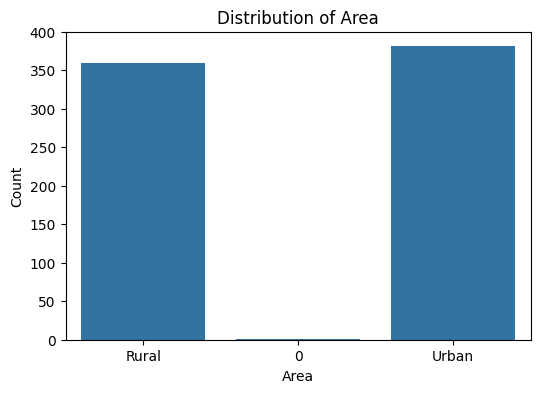


Summary of Area:

Area
Urban    381
Rural    359
0          1
Name: count, dtype: int64

Percentage Distribution:

Area
Urban    51.42
Rural    48.45
0         0.13
Name: proportion, dtype: float64


In [97]:
# Distribution of Area
plt.figure(figsize=(6,4))
sns.countplot(x='Area', data=df)
plt.title('Distribution of Area')
plt.xlabel('Area')
plt.ylabel('Count')
plt.show()

# Summary
print(f"\nSummary of Area:\n")
print(df['Area'].value_counts())
print("\nPercentage Distribution:\n")
print((df['Area'].value_counts(normalize=True) * 100).round(2))

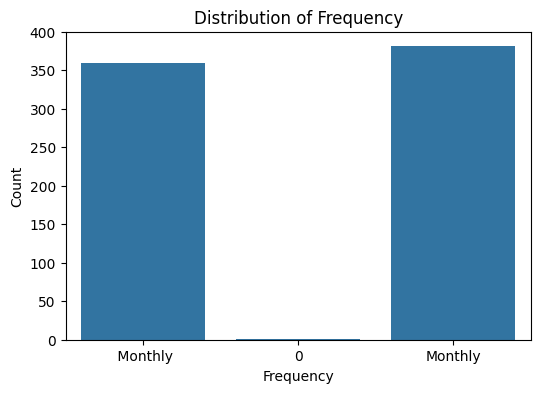


Summary of Frequency:

Frequency
Monthly     381
 Monthly    359
0             1
Name: count, dtype: int64

Percentage Distribution:

Frequency
Monthly     51.42
 Monthly    48.45
0            0.13
Name: proportion, dtype: float64


In [98]:
# Distribution of Frequency
plt.figure(figsize=(6,4))
sns.countplot(x='Frequency', data=df)
plt.title('Distribution of Frequency')
plt.xlabel('Frequency')
plt.ylabel('Count')
plt.show()

# Summary
print(f"\nSummary of Frequency:\n")
print(df['Frequency'].value_counts())
print("\nPercentage Distribution:\n")
print((df['Frequency'].value_counts(normalize=True) * 100).round(2))

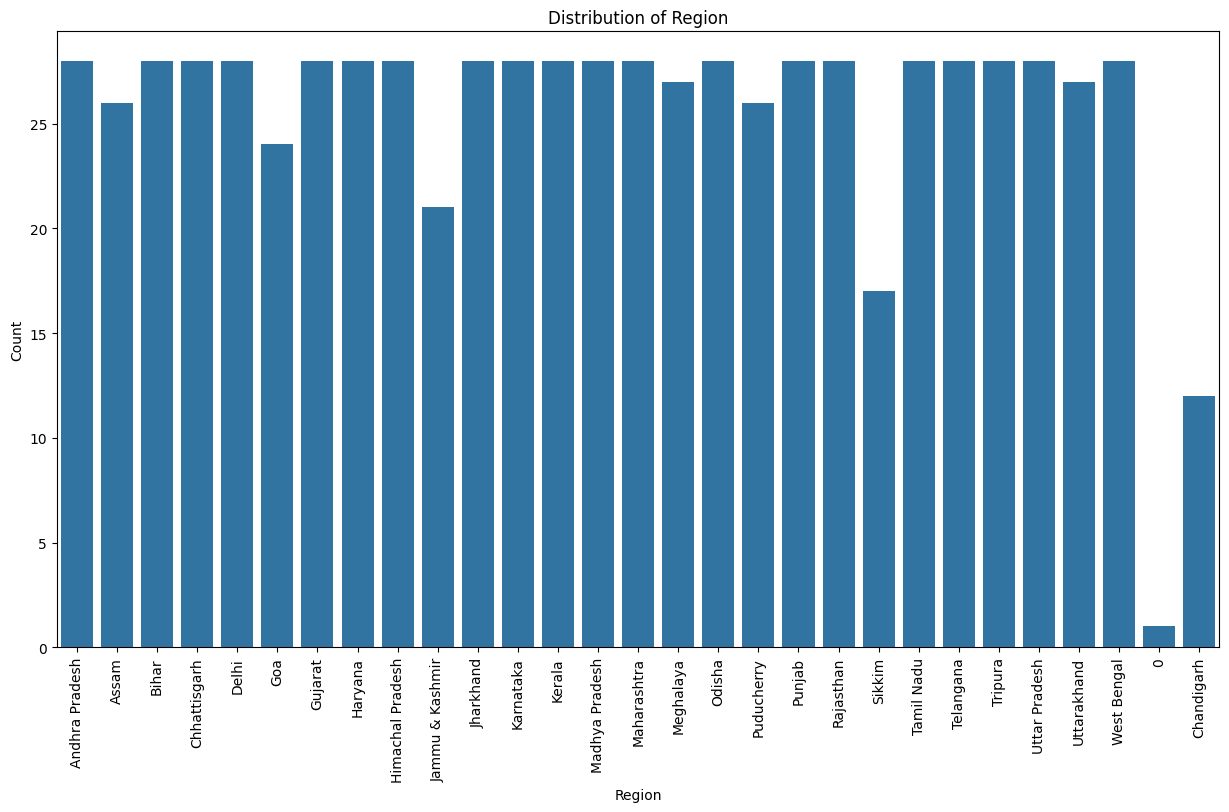


Summary of Region:

Region
Andhra Pradesh      28
Bihar               28
Chhattisgarh        28
Delhi               28
Gujarat             28
Kerala              28
Haryana             28
Himachal Pradesh    28
Jharkhand           28
Karnataka           28
Odisha              28
Maharashtra         28
Madhya Pradesh      28
West Bengal         28
Uttar Pradesh       28
Telangana           28
Punjab              28
Rajasthan           28
Tripura             28
Tamil Nadu          28
Meghalaya           27
Uttarakhand         27
Puducherry          26
Assam               26
Goa                 24
Jammu & Kashmir     21
Sikkim              17
Chandigarh          12
0                    1
Name: count, dtype: int64

Percentage Distribution:

Region
Andhra Pradesh      3.78
Bihar               3.78
Chhattisgarh        3.78
Delhi               3.78
Gujarat             3.78
Kerala              3.78
Haryana             3.78
Himachal Pradesh    3.78
Jharkhand           3.78
Karnataka           

In [99]:
# Distribution of Region
plt.figure(figsize=(15,8))
sns.countplot(x='Region', data=df)
plt.title('Distribution of Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

# Summary
print(f"\nSummary of Region:\n")
print(df['Region'].value_counts())
print("\nPercentage Distribution:\n")
print((df['Region'].value_counts(normalize=True) * 100).round(2))

### Bivariate Analysis

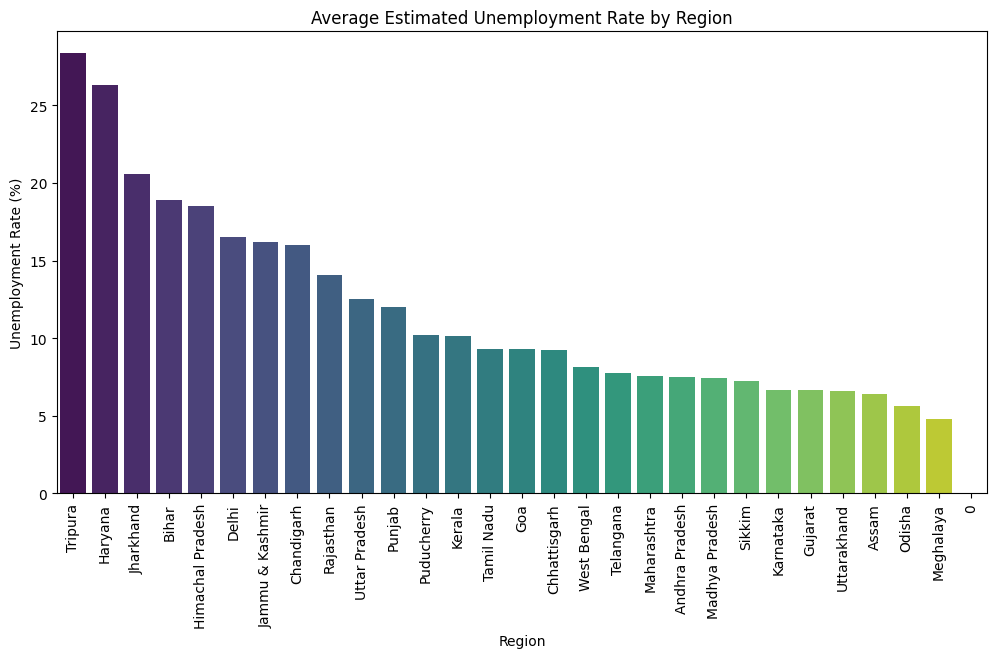


Region-wise Unemployment Rate Summary:

                  Count   Mean  Median    Std    Min    Max
Region                                                     
Tripura              28  28.35   27.31   6.06  14.71  43.64
Haryana              28  26.28   25.06   7.80  14.54  46.89
Jharkhand            28  20.58   17.28  16.67   5.01  70.17
Bihar                28  18.92   15.01  12.63   8.87  58.77
Himachal Pradesh     28  18.54   18.35   9.61   1.12  50.00
Delhi                28  16.50   15.02   6.79   9.33  45.78
Jammu & Kashmir      21  16.19   16.00   5.51   2.22  24.06
Chandigarh           12  15.99   17.51   5.51   7.22  22.05
Rajasthan            28  14.06   13.66   5.93   4.03  35.53
Uttar Pradesh        28  12.55   11.54   5.70   6.06  32.06
Punjab               28  12.03   11.08   6.93   1.13  40.59
Puducherry           26  10.22    1.23  24.11   0.00  76.74
Kerala               28  10.12    7.64   6.90   4.11  30.28
Tamil Nadu           28   9.28    2.78  14.46   0.89  53.19

In [100]:
# Average unemployment rate by region
region_summary = df.groupby('Region')['Estimated Unemployment Rate (%)'].agg(
  Count='count', Mean='mean',Median='median',Std='std',Min='min',Max='max'
).sort_values(by='Mean', ascending=False)

# Plotting
plt.figure(figsize=(12,6))
sns.barplot(
    x=region_summary.index,
    y=region_summary['Mean'],
    palette='viridis'
)
plt.xticks(rotation=90)
plt.title('Average Estimated Unemployment Rate by Region')
plt.xlabel('Region')
plt.ylabel('Unemployment Rate (%)')
plt.show()

# Summary
print("\nRegion-wise Unemployment Rate Summary:\n")
print(region_summary.round(2))

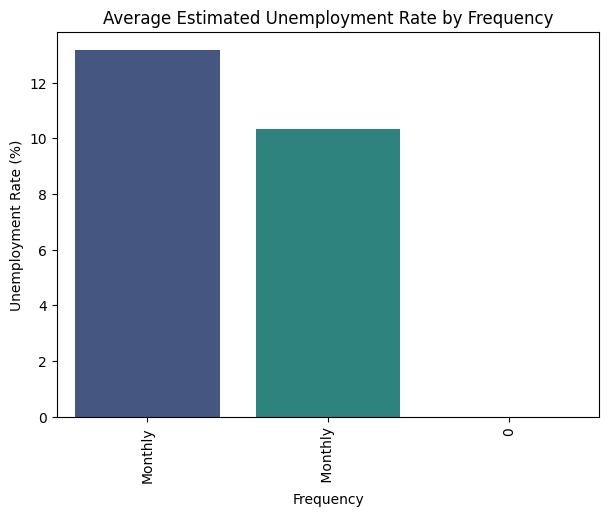


Frequency-wise Unemployment Rate Summary:

           Count   Mean  Median    Std  Min    Max
Frequency                                         
Monthly      381  13.17    9.97  11.17  0.0  76.74
 Monthly     359  10.32    6.76  10.04  0.0  74.51
0              1   0.00    0.00    NaN  0.0   0.00


In [101]:
# Average unemployment rate by Frequency
Frequency_summary = df.groupby('Frequency')['Estimated Unemployment Rate (%)'].agg(
  Count='count', Mean='mean',Median='median',Std='std',Min='min',Max='max'
).sort_values(by='Mean', ascending=False)

# Plotting
plt.figure(figsize=(7,5))
sns.barplot(
    x=Frequency_summary.index,
    y=Frequency_summary['Mean'],
    palette='viridis'
)
plt.xticks(rotation=90)
plt.title('Average Estimated Unemployment Rate by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Unemployment Rate (%)')
plt.show()

# Summary
print("\nFrequency-wise Unemployment Rate Summary:\n")
print(Frequency_summary.round(2))

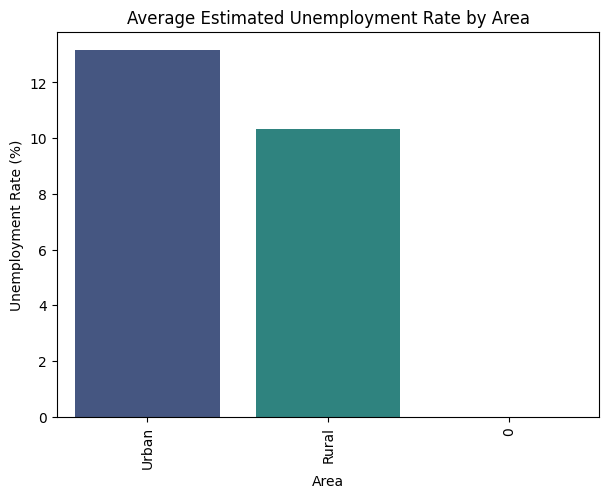


Area-wise Unemployment Rate Summary:

       Count   Mean  Median    Std  Min    Max
Area                                          
Urban    381  13.17    9.97  11.17  0.0  76.74
Rural    359  10.32    6.76  10.04  0.0  74.51
0          1   0.00    0.00    NaN  0.0   0.00


In [102]:
# Average unemployment rate by Area
Area_summary = df.groupby('Area')['Estimated Unemployment Rate (%)'].agg(
  Count='count', Mean='mean',Median='median',Std='std',Min='min',Max='max'
).sort_values(by='Mean', ascending=False)

# Plotting
plt.figure(figsize=(7,5))
sns.barplot(
    x=Area_summary.index,
    y=Area_summary['Mean'],
    palette='viridis'
)
plt.xticks(rotation=90)
plt.title('Average Estimated Unemployment Rate by Area')
plt.xlabel('Area')
plt.ylabel('Unemployment Rate (%)')
plt.show()

# Summary
print("\nArea-wise Unemployment Rate Summary:\n")
print(Area_summary.round(2))

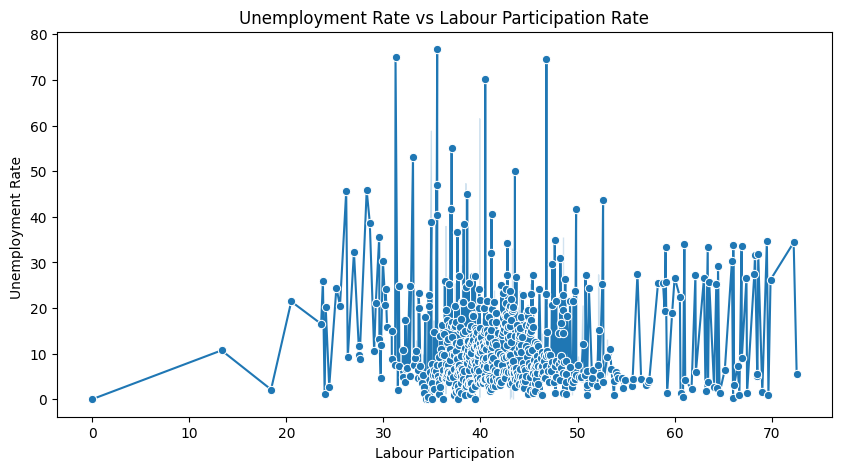


Statistical Summary of Labour Participation:

count    741.00
mean      42.57
std        8.26
min        0.00
25%       38.04
50%       41.14
75%       45.49
max       72.57
Name: Estimated Labour Participation Rate (%), dtype: float64

Statistical Summary of Unemployment Rate:

count    741.00
mean      11.77
std       10.72
min        0.00
25%        4.65
50%        8.33
75%       15.88
max       76.74
Name: Estimated Unemployment Rate (%), dtype: float64


In [103]:
# Average unemployment for each labour participation
plt.figure(figsize=(10,5))
sns.lineplot(
    data=df,
    x='Estimated Labour Participation Rate (%)',
    y='Estimated Unemployment Rate (%)',
    marker='o'
)
plt.title('Unemployment Rate vs Labour Participation Rate')
plt.xlabel('Labour Participation')
plt.ylabel('Unemployment Rate ')
plt.show()

# Summary AFTER graph
print(f"\nStatistical Summary of Labour Participation:\n")
print(df['Estimated Labour Participation Rate (%)'].describe().round(2))

print(f"\nStatistical Summary of Unemployment Rate:\n")
print(df['Estimated Unemployment Rate (%)'].describe().round(2))


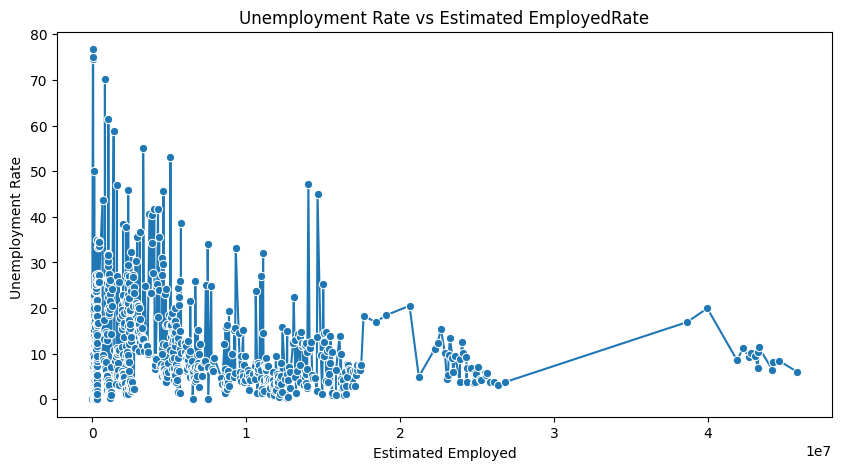


Statistical Summary of Estimated Employed:

count         741.00
mean      7194737.41
std       8086853.75
min             0.00
25%       1183770.00
50%       4743179.00
75%      11265828.00
max      45777509.00
Name: Estimated Employed, dtype: float64

Statistical Summary of Unemployment Rate:

count    741.00
mean      11.77
std       10.72
min        0.00
25%        4.65
50%        8.33
75%       15.88
max       76.74
Name: Estimated Unemployment Rate (%), dtype: float64


In [104]:
# Average unemployment for each Estimated Employed
plt.figure(figsize=(10,5))
sns.lineplot(
    data=df,
    x='Estimated Employed',
    y='Estimated Unemployment Rate (%)',
    marker='o'
)
plt.title('Unemployment Rate vs Estimated EmployedRate')
plt.xlabel('Estimated Employed')
plt.ylabel('Unemployment Rate ')
plt.show()

# Summary
print(f"\nStatistical Summary of Estimated Employed:\n")
print(df['Estimated Employed'].describe().round(2))

print(f"\nStatistical Summary of Unemployment Rate:\n")
print(df['Estimated Unemployment Rate (%)'].describe().round(2))

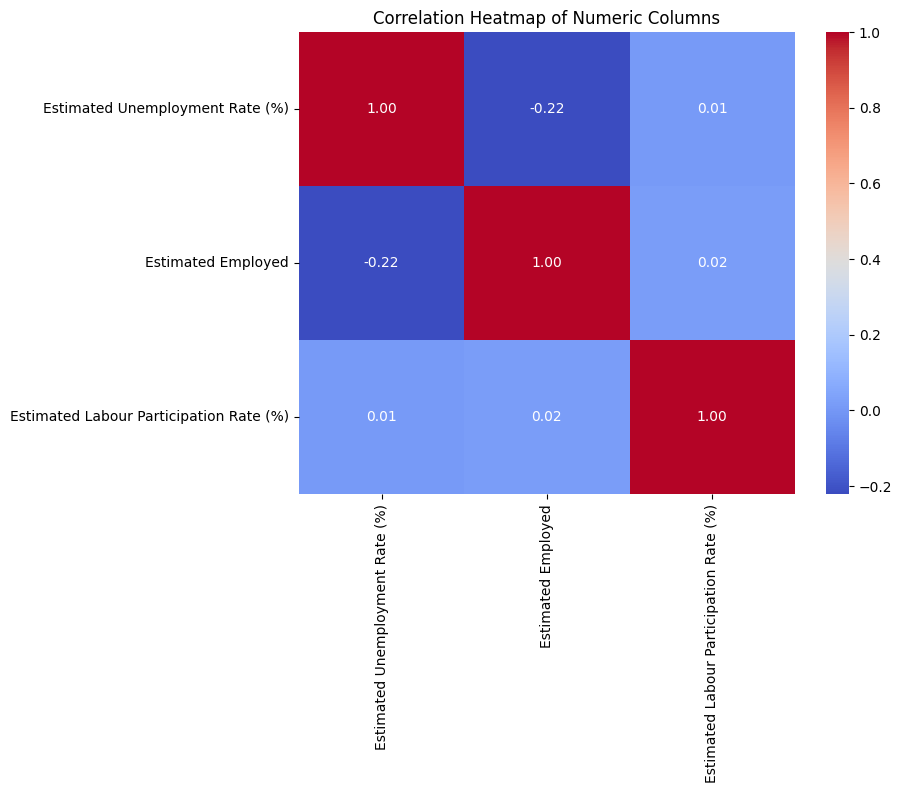

In [105]:
numeric_cols = ['Estimated Unemployment Rate (%)', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']

# Correlation matrix
corr = df[numeric_cols].corr()

# Heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()